In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import patsy

In [2]:
df = pd.read_excel("./data/data_2017.xlsx")

In [3]:
df.columns

Index(['hhid', 'DR', 'DEP', 'INS', 'STO', 'DEBT', 'INC', 'EDU', 'SIZE', 'AGE',
       'RUR', 'DIFI'],
      dtype='object')

In [4]:
df.columns = ["hhid", "Rate", "Deposits", "Insurance", "Stock", "Debt", "Income", "Education", "Size", "Age", "Rural", "DIFI"]

In [5]:
df_ln = df.copy()

In [6]:
df_ln['Deposits'] = np.log(df_ln['Deposits'])
df_ln['Insurance'] = np.log(df_ln['Insurance'])
df_ln['Stock'] = np.log(df_ln['Stock'])
df_ln['Debt'] = np.log(df_ln['Debt'])
df_ln['Income'] = np.log(df_ln['Income'])
df_ln['Education'] = np.log(df_ln['Education'])
df_ln['Size'] = np.log(df_ln['Size'])
df_ln['Age'] = np.log(df_ln['Age'])
df_ln['Rural'] = np.log(df_ln['Rural'])
df_ln.replace([np.inf, -np.inf], 0.01, inplace=True)

C:\Users\linji\miniconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\linji\miniconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
y, X = patsy.dmatrices('Rate ~ Deposits + Insurance + Stock + Debt + Income + Education + Size + Age + Rural + DIFI', data=df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          6.32e-234
Time:                        19:51:14   Log-Likelihood:                 6940.4
No. Observations:               39996   AIC:                        -1.386e+04
Df Residuals:                   39985   BIC:                        -1.376e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3272      0.014     23.914      0.0

In [8]:
res.mse_model

4.693306541245056

In [9]:
y, X = patsy.dmatrices('Rate ~ Deposits + Insurance + Stock + Debt + Income + Education + Size + Age + Rural + DIFI', data=df_ln, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.39e-303
Time:                        19:51:17   Log-Likelihood:                 7032.3
No. Observations:               39497   AIC:                        -1.404e+04
Df Residuals:                   39486   BIC:                        -1.395e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1453      0.021      6.814      0.0

In [10]:
res.mse_model

6.014940582343934

In [11]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import shap
from sklearn.metrics import mean_squared_error

C:\Users\linji\miniconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\linji\miniconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=1

In [12]:
df_ln.columns

Index(['hhid', 'Rate', 'Deposits', 'Insurance', 'Stock', 'Debt', 'Income',
       'Education', 'Size', 'Age', 'Rural', 'DIFI'],
      dtype='object')

In [13]:
y, X = patsy.dmatrices('Rate ~ Deposits + Insurance + Stock + Debt + Income + Education + Size + Age + Rural + DIFI', data=df_ln, return_type='dataframe')

In [14]:
X = X.drop(['Intercept'], axis=1)

In [15]:
model = XGBRegressor(n_estimators=100,learning_rate=0.3,max_depth=6,objective='reg:squarederror')

In [16]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [17]:
res = model.fit(X, y)

In [18]:
y_pred = model.predict(X)

In [19]:
mean_squared_error(y, y_pred)

0.030463243869515544

In [20]:
explainer = shap.TreeExplainer(model)

In [21]:
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [22]:
df_ln.columns

Index(['hhid', 'Rate', 'Deposits', 'Insurance', 'Stock', 'Debt', 'Income',
       'Education', 'Size', 'Age', 'Rural', 'DIFI'],
      dtype='object')

In [23]:
shape_result = shap_values.copy()
shape_result = np.abs(shape_result)
shape_result = shape_result.sum(axis=0)/shape_result.shape[0]
shape_result

array([0.01354948, 0.00957937, 0.00249356, 0.00798324, 0.02636568,
       0.00820888, 0.01679196, 0.01918189, 0.01071215, 0.01974413],
      dtype=float32)

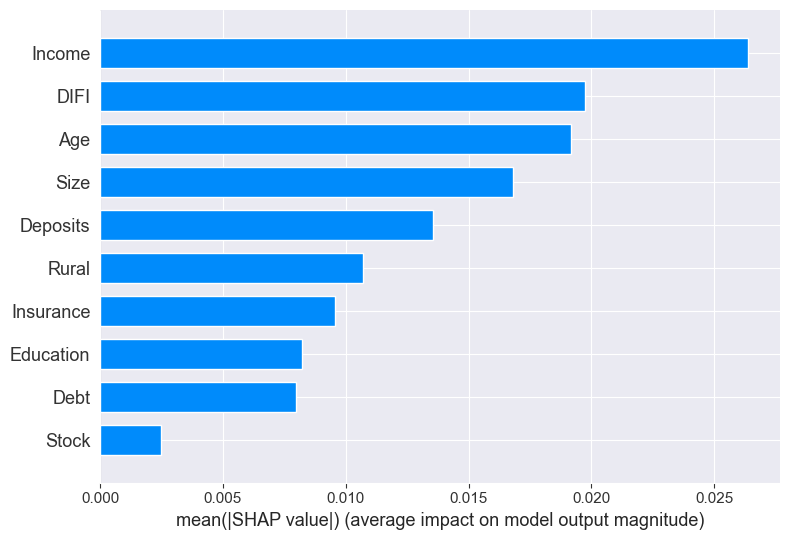

In [24]:
fig = shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.savefig("shap_plot_2017.pdf", dpi=700)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


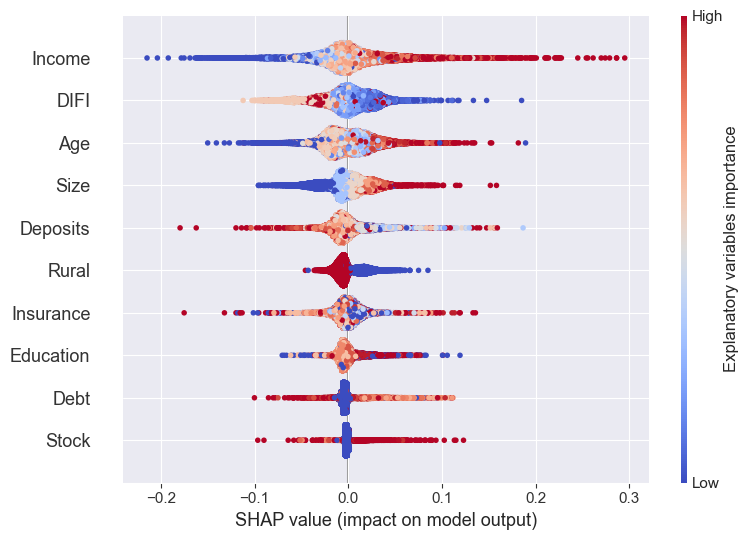

In [25]:
fig = shap.summary_plot(shap_values, X, color_bar_label='Explanatory variables importance', plot_type="dot", cmap="coolwarm", show=False)
plt.savefig("summary_plot_2017.pdf", dpi=700)

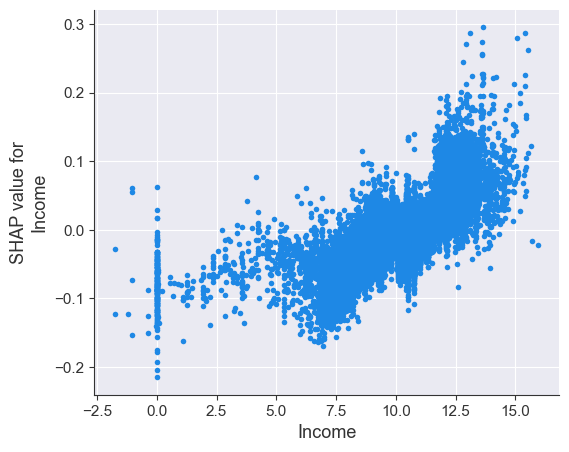

In [26]:
fig = shap.dependence_plot('Income', shap_values, X, interaction_index=None, show=False)
plt.savefig("income_plot_2017.pdf", dpi=700)

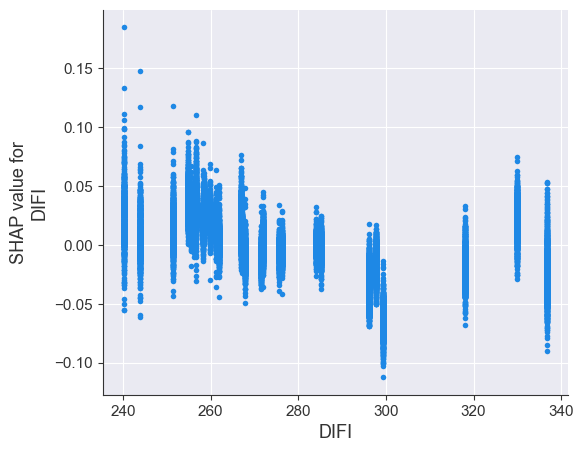

In [27]:
fig = shap.dependence_plot('DIFI', shap_values, X, interaction_index=None, show=False)
plt.savefig("difi_plot_2017.pdf", dpi=700)

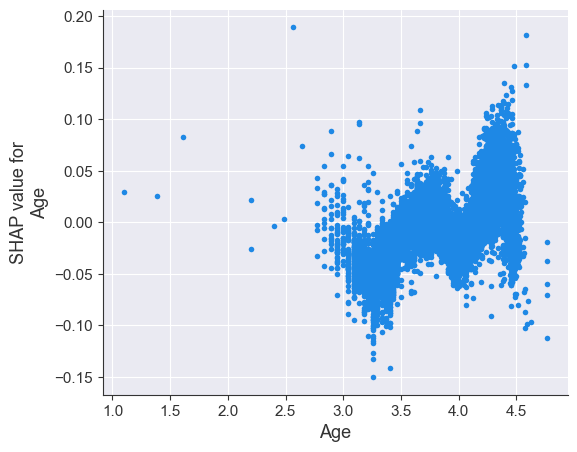

In [28]:
fig = shap.dependence_plot('Age', shap_values, X, interaction_index=None, show=False)
plt.savefig("age_plot_2017.pdf", dpi=700)

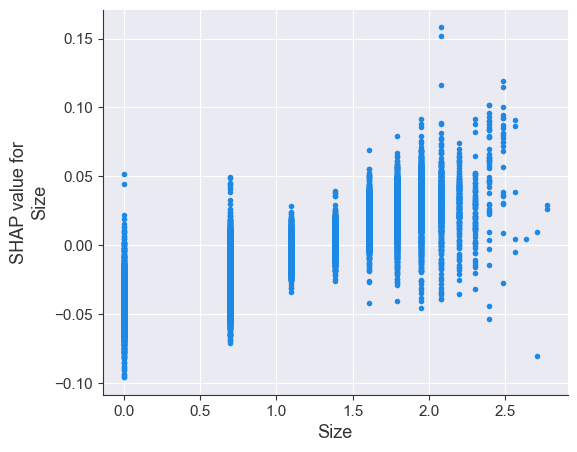

In [29]:
fig = shap.dependence_plot('Size', shap_values, X, interaction_index=None, show=False)
plt.savefig("size_plot_2017.pdf", dpi=700)

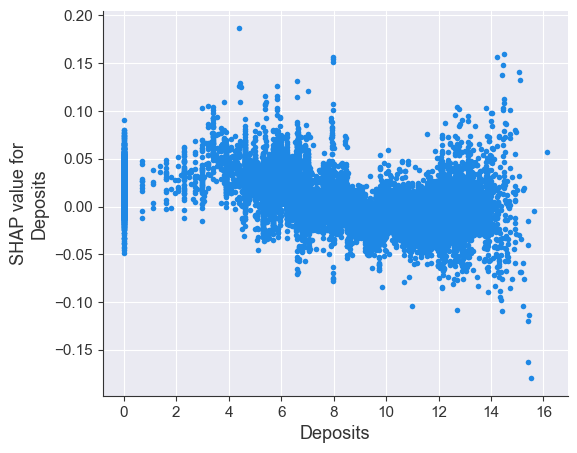

In [30]:
fig = shap.dependence_plot('Deposits', shap_values, X, interaction_index=None, show=False)
plt.savefig("deposits_plot_2017.pdf", dpi=700)

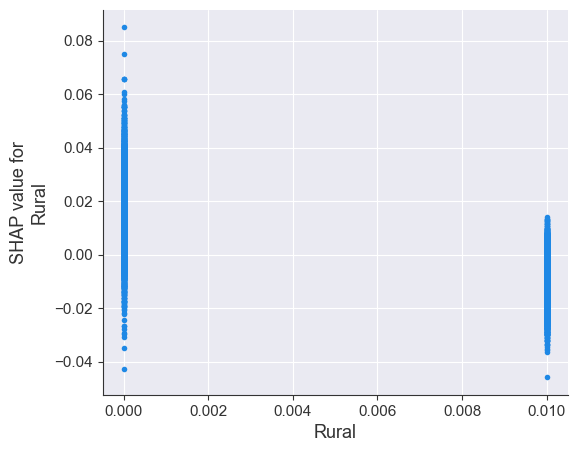

In [31]:
fig = shap.dependence_plot('Rural', shap_values, X, interaction_index=None, show=False)
plt.savefig("rural_plot_2017.pdf", dpi=700)

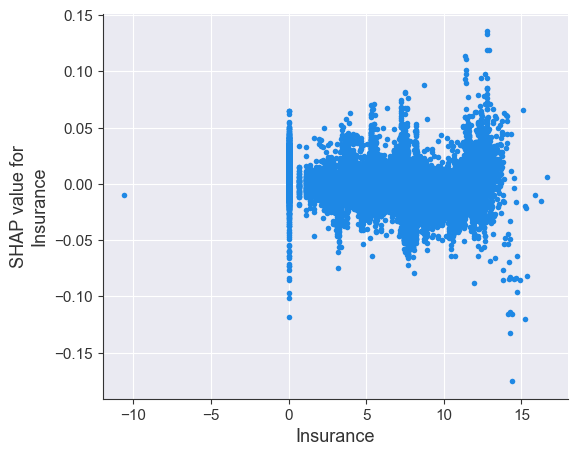

In [32]:
fig = shap.dependence_plot('Insurance', shap_values, X, interaction_index=None, show=False)
plt.savefig("insurance_plot_2017.pdf", dpi=700)

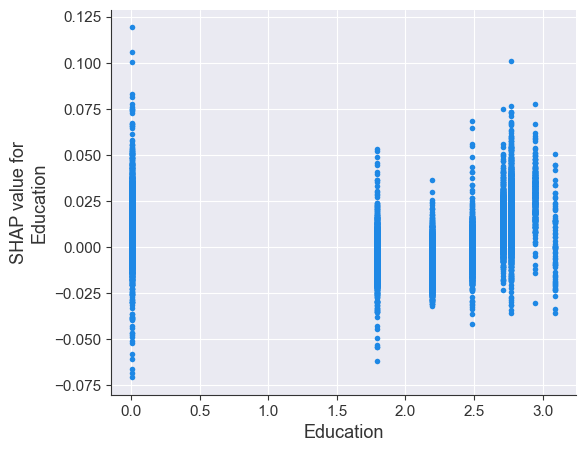

In [33]:
fig = shap.dependence_plot('Education', shap_values, X, interaction_index=None, show=False)
plt.savefig("education_plot_2017.pdf", dpi=700)

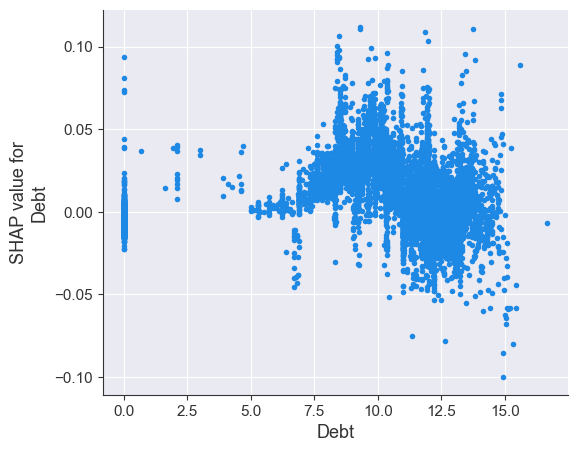

In [34]:
fig = shap.dependence_plot('Debt', shap_values, X, interaction_index=None, show=False)
plt.savefig("debt_plot_2017.pdf", dpi=700)

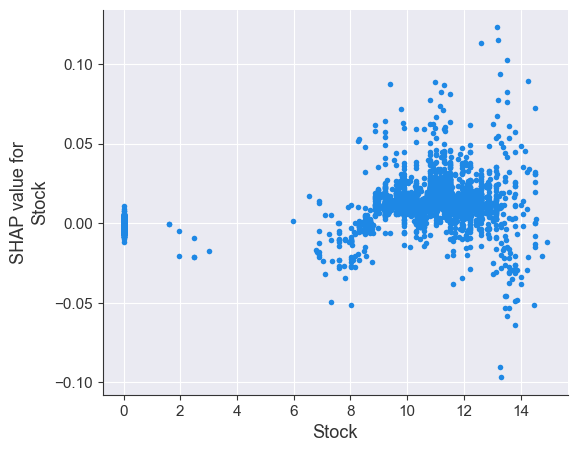

In [35]:
fig = shap.dependence_plot('Stock', shap_values, X, interaction_index=None, show=False)
plt.savefig("stock_plot_2017.pdf", dpi=700)

In [125]:
fig = shap.dependence_plot('Income', shap_values, X, interaction_index=None, show=False)
plt.savefig("income_plot_2017.pdf", dpi=700)

In [129]:
tmp["DEP_shap"] = np.abs(tmp["DEP_shap"])
tmp["DIFI"] = np.log(tmp["DIFI"])

In [130]:
difi_dep_y, difi_dep_X = patsy.dmatrices('DEP_shap ~ DIFI', data=tmp, return_type='dataframe')
mod = sm.OLS(difi_dep_y, difi_dep_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DEP_shap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07951
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.778
Time:                        21:02:22   Log-Likelihood:                 97412.
No. Observations:               32800   AIC:                        -1.948e+05
Df Residuals:                   32798   BIC:                        -1.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0130      0.004      3.095      0.0

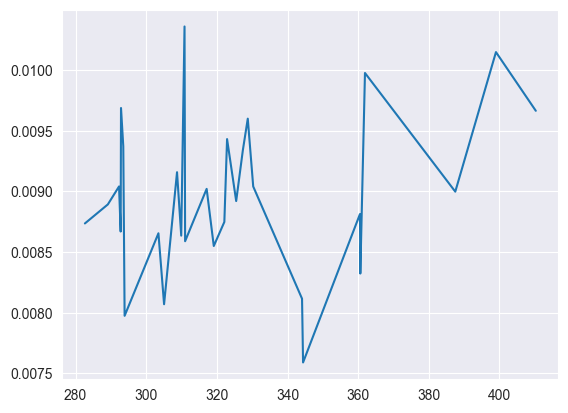

In [101]:
index = 1
tmp = pd.concat([X["DIFI"], pd.DataFrame(shap_values[:,index])], axis=1)
group = tmp.groupby("DIFI")
group_x = [list(group)[i][0] for i in range(len(group))]
group_y = [np.abs(list(group)[i][1][0]).mean() for i in range(len(group))]
plt.plot(group_x, group_y)

In [131]:
tmp.columns = ["DIFI", "INS_shap"]
tmp["INS_shap"] = np.abs(tmp["INS_shap"])
tmp["DIFI"] = np.log(tmp["DIFI"])
difi_dep_y, difi_dep_X = patsy.dmatrices('INS_shap ~ DIFI', data=tmp, return_type='dataframe')
mod = sm.OLS(difi_dep_y, difi_dep_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               INS_shap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09783
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.754
Time:                        21:03:33   Log-Likelihood:                 97412.
No. Observations:               32800   AIC:                        -1.948e+05
Df Residuals:                   32798   BIC:                        -1.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0142      0.007      1.905      0.0

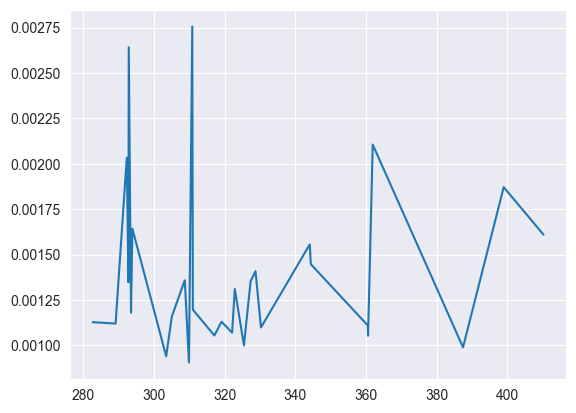

In [103]:
index = 2
tmp = pd.concat([X["DIFI"], pd.DataFrame(shap_values[:,index])], axis=1)
group = tmp.groupby("DIFI")
group_x = [list(group)[i][0] for i in range(len(group))]
group_y = [np.abs(list(group)[i][1][0]).mean() for i in range(len(group))]
plt.plot(group_x, group_y)

In [132]:
tmp.columns = ["DIFI", "STO_shap"]
tmp["STO_shap"] = np.abs(tmp["STO_shap"])
tmp["DIFI"] = np.log(tmp["DIFI"])
difi_dep_y, difi_dep_X = patsy.dmatrices('STO_shap ~ DIFI', data=tmp, return_type='dataframe')
mod = sm.OLS(difi_dep_y, difi_dep_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               STO_shap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1091
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.741
Time:                        21:04:53   Log-Likelihood:                 97412.
No. Observations:               32800   AIC:                        -1.948e+05
Df Residuals:                   32798   BIC:                        -1.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0132      0.004      3.147      0.0

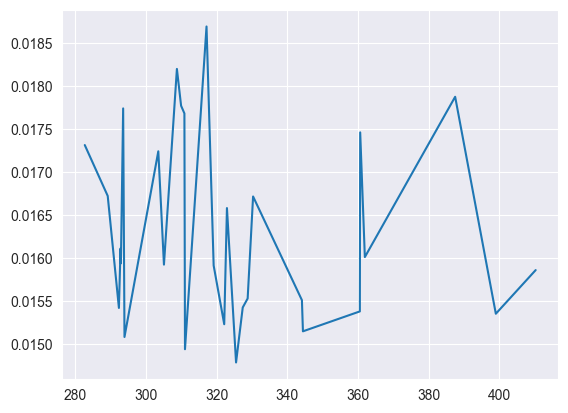

In [104]:
index = 3
tmp = pd.concat([X["DIFI"], pd.DataFrame(shap_values[:,index])], axis=1)
group = tmp.groupby("DIFI")
group_x = [list(group)[i][0] for i in range(len(group))]
group_y = [np.abs(list(group)[i][1][0]).mean() for i in range(len(group))]
plt.plot(group_x, group_y)

In [133]:
tmp.columns = ["DIFI", "DEBT_shap"]
tmp["DEBT_shap"] = np.abs(tmp["DEBT_shap"])
tmp["DIFI"] = np.log(tmp["DIFI"])
difi_dep_y, difi_dep_X = patsy.dmatrices('DEBT_shap ~ DIFI', data=tmp, return_type='dataframe')
mod = sm.OLS(difi_dep_y, difi_dep_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              DEBT_shap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1305
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.718
Time:                        21:05:30   Log-Likelihood:                 97412.
No. Observations:               32800   AIC:                        -1.948e+05
Df Residuals:                   32798   BIC:                        -1.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0110      0.002      4.517      0.0

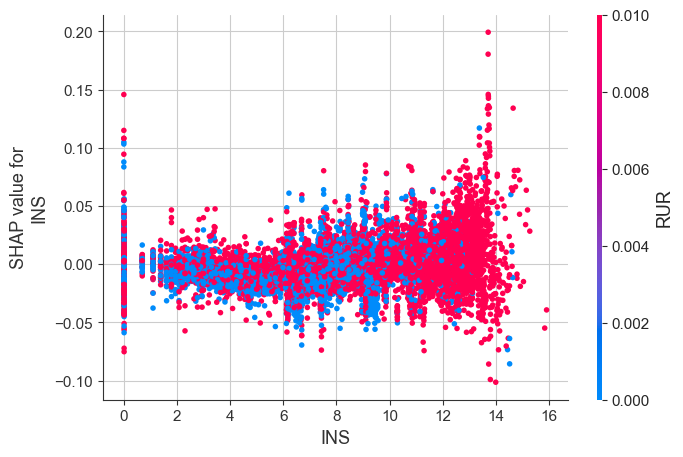

In [46]:
shap.dependence_plot('INS', shap_values, X, interaction_index="RUR", show=False)

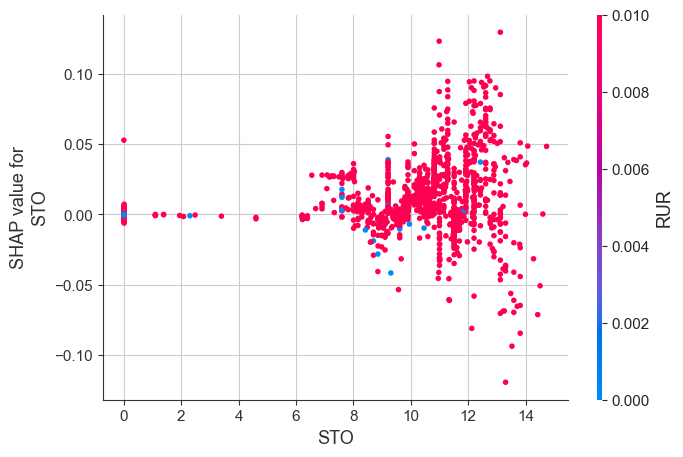

In [45]:
shap.dependence_plot('STO', shap_values, X, interaction_index="RUR", show=False)

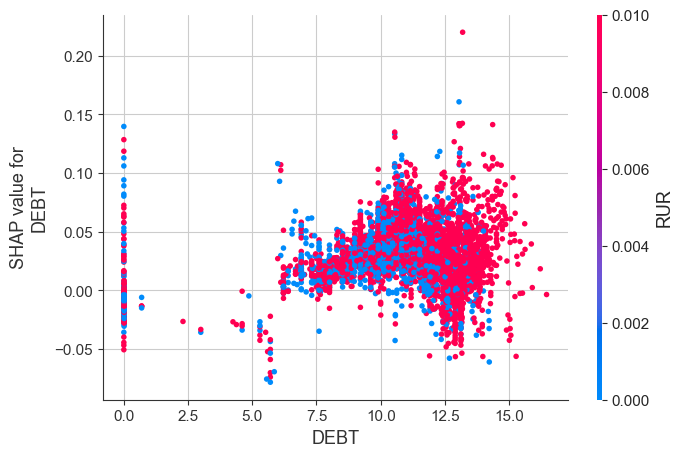

In [44]:
shap.dependence_plot('DEBT', shap_values, X, interaction_index="RUR", show=False)

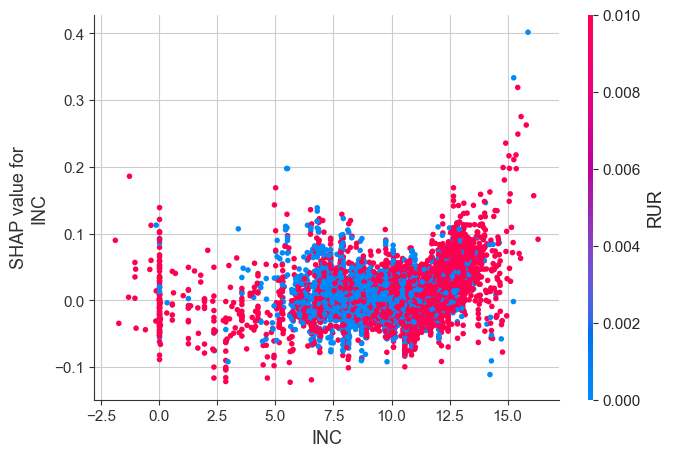

In [47]:
shap.dependence_plot('INC', shap_values, X, interaction_index="RUR", show=False)

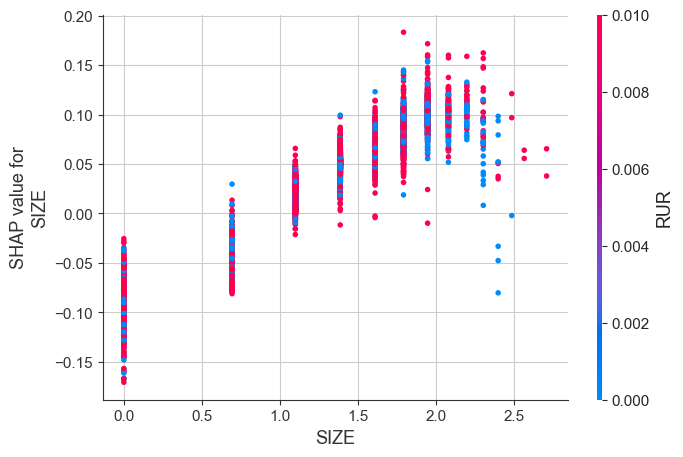

In [48]:
shap.dependence_plot('SIZE', shap_values, X, interaction_index="RUR", show=False)

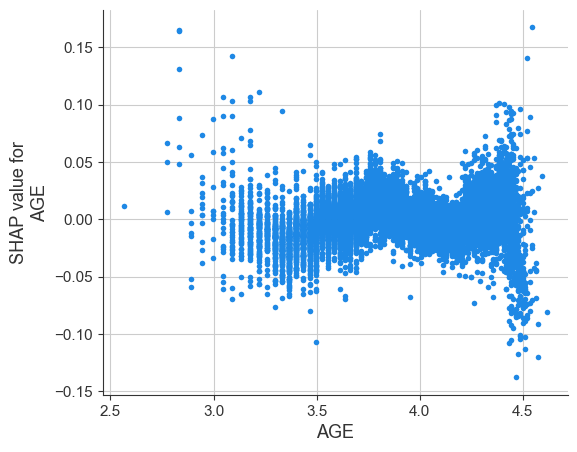

In [39]:
shap.dependence_plot('AGE', shap_values, X, interaction_index=None, show=False)

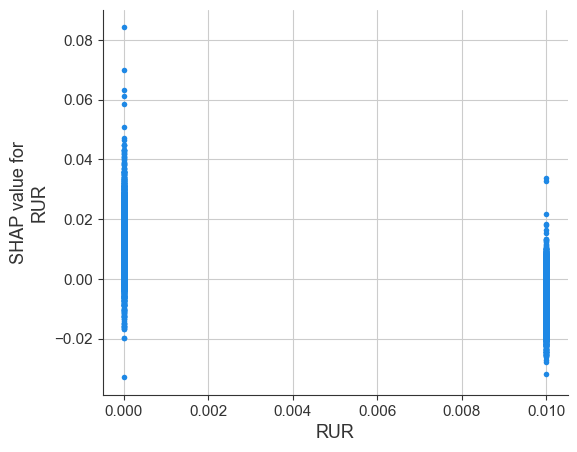

In [40]:
shap.dependence_plot('RUR', shap_values, X, interaction_index=None, show=False)

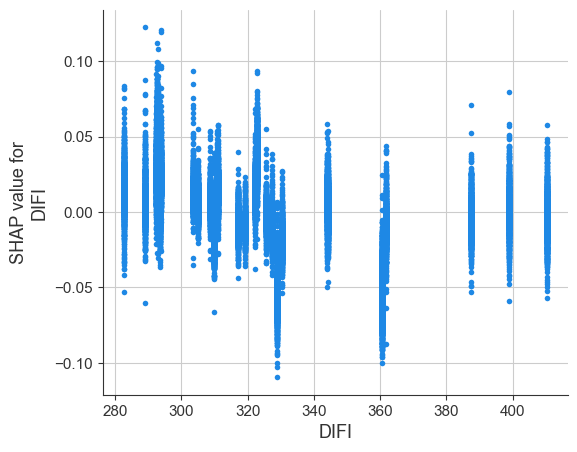

In [41]:
shap.dependence_plot('DIFI', shap_values, X, interaction_index=None, show=False)

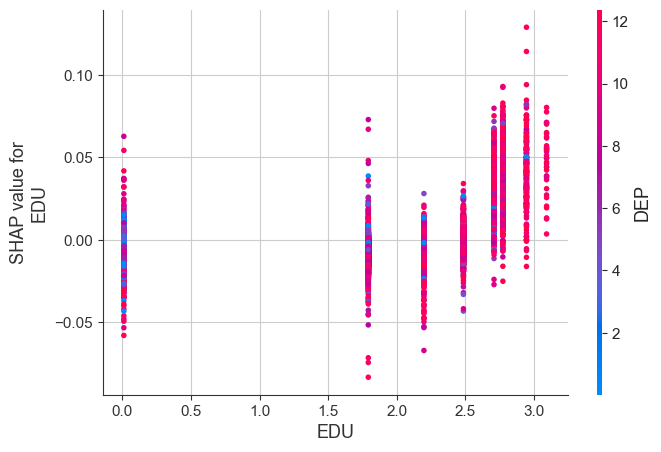

In [42]:
shap.dependence_plot('EDU', shap_values, X, interaction_index='DEP', show=False)